## Data Science Project: Comparing data from YouTube Shorts and TikTok For You Page
**Bobby Rizzo**

### Background
The rapid growth of short-form video platforms like YouTube Shorts and TikTok has revolutionized the way users consume content. These platforms use sophisticated algorithms to curate personalized feeds, such as TikTok's "For You Page" (FYP) and YouTube Shorts' recommendations. Understanding how these algorithms work, the type of content they promote, and the user engagement they generate is crucial for content creators, marketers, and platform developers.

### Objective
This data science project aims to compare and analyze the data from YouTube Shorts and TikTok For You Page. The primary objectives include:
1. Identifying the characteristics of viral content on both platforms.
2. Understanding the differences in user engagement metrics (likes, comments, shares, watch time).
3. Analyzing the impact of various content features (hashtags, music, captions) on video popularity.
4. Comparing the recommendation algorithms in terms of content diversity and personalization.



## Methodology


To achieve these objectives, the project will follow these steps:

1. **Data Collection**:
   - Scrape or collect a substantial dataset of videos from YouTube Shorts and TikTok FYP.
   - Gather metadata for each video, including views, likes, comments, shares, hashtags, duration, and uploader information.

2. **Data Cleaning and Preprocessing**:
   - Clean and preprocess the data to handle missing values, remove duplicates, and normalize text features.
   - Standardize the data formats for consistent analysis across both platforms.

3. **Exploratory Data Analysis (EDA)**:
   - Perform EDA to uncover initial patterns and insights.
   - Visualize the distribution of key metrics like views, likes, comments, and shares.


4. **Algorithm Analysis**:
   - Investigate the recommendation algorithms by analyzing the diversity and personalization of recommended content.
   - Study the user feedback mechanisms (likes, comments) and their impact on content visibility.

5. **Visualization and Reporting**:
   - Create visualizations to present the findings in an intuitive and accessible manner.
   - Prepare a comprehensive report summarizing the insights and implications for content creators and marketers.

### Expected Outcomes
This project is expected to provide valuable insights into the dynamics of short-form video content on YouTube Shorts and TikTok. By understanding the differences and similarities between these platforms, content creators can optimize their strategies to maximize reach and engagement. Additionally, the findings could inform platform developers and marketers about user preferences and behaviors, leading to more effective content recommendation systems and marketing campaigns.



## Research Gaps


  #### 1. Comparative Analysis of Algorithmic Recommendations:
  - Limited understanding of how different recommendation algorithms influence content discovery and user engagement across platforms.
  - Insufficient analysis of algorithm transparency and the potential biases embedded within these systems.

  #### 2. **Cross-Platform Content Strategy**
  - Lack of research on effective content strategies that work across different short-form video platforms.
  - Limited insights into how creators can optimize content for multiple platforms simultaneously.

  #### 3. **User Behavior and Interaction**
  - Insufficient studies on user interaction patterns and behaviors specific to short-form video content on different platforms.
  - Need for comparative analysis of user engagement metrics (e.g., likes, shares, comments) and how they differ across platforms.

  #### 4. **Content Virality Factors**:
  - Gaps in identifying and comparing the factors that contribute to content virality on different platforms.
  - Limited research on the role of hashtags, music, and other content features in driving video popularity.

  #### 5. **Impact of Platform Design**:
  - Need for more studies on how the design and interface of platforms influence user experience and content consumption.
  - Comparative analysis of user retention and engagement based on platform design elements.

  #### 6. **Influence of Demographics and Psychographics**:
  - Insufficient research on how different demographic and psychographic factors influence user preferences and engagement on various platforms.
  - Need for comparative studies on the audience demographics of YouTube Shorts and TikTok.

  #### 7. **Monetization and Economic Impact**:
  - Limited understanding of the economic impact of content creation on different platforms.
  - Need for more research on monetization strategies and their effectiveness across platforms.

  #### 8. **Social and Cultural Impact**:
  - Lack of studies on the broader social and cultural impact of short-form video content on society.
  - Comparative analysis of content trends and their cultural implications across different platforms.

  #### 9. **Longitudinal Studies**:
  - Need for long-term studies to understand how user behavior and platform algorithms evolve over time.
  - Insufficient longitudinal research on the sustained impact of viral content and user engagement.

  #### 10. **Ethical Considerations**:
  - Gaps in research on the ethical implications of recommendation algorithms and data privacy concerns.
  - Need for more studies on the impact of platform policies on content moderation and user safety.

## Execution


### Setting up virtual environment

To activate the virtual environment named "Project", you can select the "Project" kernel. If you have any issues with this, email me at rrizzo@nd.edu


To install the required packages listed in the `requirements.txt` file, you can use the following command:

In [ ]:
%pip install -r ../requirements.txt

### Data Collection: Web Scraping


Web scraping is a crucial method for collecting data from online platforms such as YouTube Shorts and TikTok. This technique involves extracting large amounts of information from websites, which can then be analyzed to gain insights into user behavior, content characteristics, and platform algorithms. In the context of this project, web scraping will be used to gather metadata and engagement metrics for a substantial number of videos from both platforms.

#### Steps Involved in Web Scraping

1. **Selecting the Tools and Libraries**:
   - Popular Python libraries such as BeautifulSoup and Selenium will be used for web scraping. BeautifulSoup is excellent for parsing HTML and XML documents and Selenium is useful for interacting with dynamic web pages.


#### Global Imports

In [42]:
import os
import warnings
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException, WebDriverException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

### Web Scraping TikTok

#### Import TikTok Specific Modules

In [11]:
import pyktok as pyk

#### Make Test Variables

In [12]:
SCROLLS = 5  # Number of scrolls to perform
DEBUG_FREEZE = False  # Set to True to pause after each scroll for debugging
seconds_between_scroll = 1  # Adjust based on actual load times
STEP_SCROLL = False # step by step scrolling
scroll_count = 0 # Leave this at 0

#### Warning Supression

In [13]:
warnings.filterwarnings("ignore")  
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

#### Webdriver Setup

In [21]:
options = webdriver.ChromeOptions() # Options to configure the WebDriver
options.add_argument("--mute-audio")  # Mute all sounds
options.add_experimental_option("excludeSwitches", ["enable-automation"])  # Less bot-like
options.add_experimental_option('useAutomationExtension', False)
ePath = f"/html/body/div[1]/div[2]/div[2]/div[1]/div[{scroll_count+1}]"
driver = webdriver.Chrome(options=options)

#### Helper Functions

In [15]:
def continue_as_guest():
    try:
        # Use WebDriverWait to wait for the element to be clickable
        wait = WebDriverWait(driver, 10)  # Adjust timeout as needed
        # Update XPath to target the specific structure of the guest prompt
        guest_button_xpath = "//div[contains(@class, 'css-txolmk-DivGuestModeContainer')]//div[contains(text(), 'Continue as guest')]"
        guest_button = wait.until(EC.element_to_be_clickable((By.XPATH, guest_button_xpath)))
        guest_button.click()
        print("Continued as guest.")
    except TimeoutException:
        print("No guest prompt found, continuing...")

def test_epath():
    # To find a single element
    try:
        element = driver.find_element(By.XPATH, ePath)
        # Interact with the found element
        print(f"\n!!!!!Element {scroll_count+1} found!!!!!!!\n")
        # print(element)
    except NoSuchElementException:
        print("Element not found.")

#### Main Script

In [ ]:
# Navigate to TikTok's "For You" page
driver.get('https://www.tiktok.com/foryou?lang=en')

time.sleep(10) # Wait for the page to load and complete captcha

middle_link = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/div[2]")  # Locate the link in the middle of the screen
middle_link.click()  # Click the link

time.sleep(5) # Wait for the page to load and complete captcha if necessary

for scroll_count in range(SCROLLS):
    
    # Test relative path
    # test_epath()
    
    current_url = driver.current_url
    print("Current website URL:", current_url)

    # Attempt to continue as guest if prompted
    continue_as_guest()
    
    try:
        pyk.save_tiktok(current_url, True, 'tt_video_data.csv')  # Save the TikTok data to a CSV file 
    except Exception as e:
        print(f"Error: {e} Waiting for 5 seconds before retrying.")
        time.sleep(5)
        
    print(f"TikTok {scroll_count + 1}: Collected unique video URL.")
    
    if DEBUG_FREEZE:
        time.sleep(100000000) # make longer if necessary
    if STEP_SCROLL:
        input("Press Enter to scroll\n")
    else:
        time.sleep(seconds_between_scroll)
        
    print("------------------------------")
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.ARROW_DOWN)

print(f"Total unique videos collected: {scroll_count + 1}")

while input("Quit? (Y/N)") != ("Y" or "y"):
    driver.quit()

### Webscraping YouTube Shorts


#### Create YouTube Shorts downloader

In [43]:

from pytube import YouTube

def download_video_max_res(video_url):
    try:
        yt = YouTube(video_url)
        
        # Extract video information
        video_info = {
            "title": yt.title,
            "description": yt.description,
            "author": yt.author,
            "channel_id": yt.channel_id,
            "views": yt.views,
            "rating": yt.rating,
            "length": yt.length,
            "captions": yt.captions.get_by_language_code('en').generate_srt_captions() if yt.captions.get_by_language_code('en') else None, # type: ignore
            "metadata": yt.metadata
        }
        
        # Check if the CSV file exists
        file_exists = os.path.isfile("yt_video_data.csv")
        
        # Save the information to a CSV file
        with open("yt_video_data.csv", "a", newline='', encoding="utf-8") as csvfile:
            fieldnames = ["title", "description", "author", "channel_id", "views", "rating", "length", "captions", "metadata"]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            
            # Write the header only if the file does not exist
            if not file_exists:
                writer.writeheader()
            
            writer.writerow(video_info)
        
        # Save captions to a separate file if available
        if video_info["captions"]:
            with open("captions.srt", "w", encoding="utf-8") as caption_file:
                caption_file.write(video_info["captions"])
        
        # Uncomment the following lines if you want to download the video
        # stream = yt.streams.get_highest_resolution()
        # if stream:
        #     video_title = stream.title
        #     print(f"Downloading ... [{video_url}] - [{video_title.strip()}]")
        #     stream.download(output_path="ai_content_detector/media/videos/ytShorts")
        #     return f"Video downloaded successfully."
        # else:
        #     return "Unable to find a suitable video stream."
        
    except Exception as e:
        return "An error occurred: {}".format(str(e))

#### Tester Variables

In [24]:
SCROLLS = 100  # Number of scrolls to perform
DEBUG_FREEZE = False  # Set to True to pause after each scroll for debugging
seconds_between_scroll = 1  # Adjust based on actual load times
STEP_SCROLL = False # step by step scrolling
scroll_count = 0 #Leave this at 0

#### Warning Supression

In [25]:
warnings.filterwarnings("ignore")  
os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '2.0'

#### Webdriver Setup

In [26]:
options = webdriver.ChromeOptions()# Options to configure the WebDriver
options.add_argument("--mute-audio")  # Mute all sounds
options.add_experimental_option("excludeSwitches", ["enable-automation"])  # Less bot-like
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=options)

#### Helper Functions

In [27]:
def continue_as_guest():
    try:
        wait = WebDriverWait(driver, 10)  # Adjust timeout as needed
        guest_button_xpath = "//div[contains(@class, 'css-txolmk-DivGuestModeContainer')]//div[contains(text(), 'Continue as guest')]"
        guest_button = wait.until(EC.element_to_be_clickable((By.XPATH, guest_button_xpath)))
        guest_button.click()
        print("Continued as guest.")
    except TimeoutException:
        print("No guest prompt found, continuing...")

#### Main Script

In [ ]:
driver.get('https://www.youtube.com/shorts/')

time.sleep(3)

for scroll_count in range(SCROLLS):
    
    time.sleep(1)
    
    current_url = driver.current_url
    print("Current website URL:", current_url)

    # Attempt to continue as guest if prompted
    continue_as_guest()
    
    try:
        response = download_video_max_res(current_url)
    except Exception as e:
        print(f"Error: {e} Waiting for 5 seconds before retrying.")
        time.sleep(5)
        
    print(f"Video {scroll_count + 1}: Collected unique video URL.")
    if DEBUG_FREEZE:
        time.sleep(100000000)
    if STEP_SCROLL:
        input("Press Enter to scroll\n")
    else:
        time.sleep(seconds_between_scroll)
    print("------------------------------")
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.ARROW_DOWN)

print(f"Total unique videos collected: {scroll_count + 1}")

while input("Quit? (Y/N)") != ("Y" or "y"):
    driver.quit()

## Data Cleaning

### Check Duplicates and Combine Data

#### TikTok

In [29]:
BULK = 'bulk_tt_video_data.csv' # Name of the combined CSV file

file1 = 'tt_video_data.csv'
file2 = '' # leave empty to only combine data

df1 = pd.read_csv(file1)

if file2 == '':
    file2 = BULK

df2 = pd.read_csv(file2)

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2])

# Drop duplicate rows
unique_df = combined_df.drop_duplicates(subset='video_id')

# Save the result to a new CSV file
unique_df.to_csv(BULK, mode='w', index=False)

##### Next cell not required

In [ ]:

def check_csv(file_path, encoding='utf-8'):
    with open(file_path, mode='r', newline='', encoding=encoding) as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        header_length = len(header)
        row_number = 1
        for row in reader:
            row_number += 1
            if len(row) != header_length:
                print(f"Row {row_number} has {len(row)} columns. Expected {header_length} columns.")

def remove_last_columns(file_path, output_path, columns_to_remove=22, encoding='utf-8', delimiter=','):
    with open(file_path, mode='r', newline='', encoding=encoding) as infile, \
         open(output_path, mode='w', newline='', encoding=encoding) as outfile:
        
        reader = csv.reader(infile, delimiter=delimiter)
        writer = csv.writer(outfile, delimiter=delimiter)
        
        for row in reader:
            if len(row) > columns_to_remove:
                # Remove the last `columns_to_remove` columns
                row = row[:-columns_to_remove]
            writer.writerow(row)
            
def keep_first_n_columns(file_path, output_path, max_columns=22, encoding='utf-8', delimiter=','):
    with open(file_path, mode='r', newline='', encoding=encoding) as infile, \
         open(output_path, mode='w', newline='', encoding=encoding) as outfile:
        
        reader = csv.reader(infile, delimiter=delimiter)
        writer = csv.writer(outfile, delimiter=delimiter)
        
        for row in reader:
            # Keep only the first `max_columns` columns
            row = row[:max_columns]
            writer.writerow(row)


# Usage
input_file = 'bulk_tt_video_data.csv'
output_file = 'bulk_tt_video_data_cleaned.csv'
keep_first_n_columns(input_file, output_file, max_columns=22, delimiter=',')

# Usage
file_path = 'bulk_tt_video_data.csv'
check_csv(file_path)


#### YouTube

In [44]:

BULK = 'bulk_yt_video_data.csv'

file1 = 'yt_video_data.csv'
file2 = ''

df1 = pd.read_csv(file1)

if file2 == '':
    file2 = BULK

df2 = pd.read_csv(file2)

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2])

# Drop duplicate rows
unique_df = combined_df.drop_duplicates(subset='title')

# Save the result to a new CSV file
unique_df.to_csv(BULK, mode='w', index=False)

## Results

### TikTok Analysis

In [45]:


# Load the CSV data
df = pd.read_csv('bulk_tt_video_data.csv')

# Calculate engagement metrics
engagement_metrics = df[['video_playcount', 'video_diggcount', 'video_sharecount', 'video_commentcount']].describe()

# Sort videos by play count, digg count, share count, and comment count
top_played_videos = df.sort_values(by='video_playcount', ascending=False).head(10)
top_digg_videos = df.sort_values(by='video_diggcount', ascending=False).head(10)
top_shared_videos = df.sort_values(by='video_sharecount', ascending=False).head(10)
top_commented_videos = df.sort_values(by='video_commentcount', ascending=False).head(10)

# Analyze author details
top_authors_by_followers = df.sort_values(by='author_followercount', ascending=False).head(10)
top_authors_by_videos = df.sort_values(by='author_videocount', ascending=False).head(10)
verified_authors = df[df['author_verified'] == True]
non_verified_authors = df[df['author_verified'] == False]

# Compare engagement metrics for verified vs. non-verified authors
verified_engagement = verified_authors[['video_playcount', 'video_diggcount', 'video_sharecount', 'video_commentcount']].mean()
non_verified_engagement = non_verified_authors[['video_playcount', 'video_diggcount', 'video_sharecount', 'video_commentcount']].mean()

# Analyze video content
df['video_description'] = df['video_description'].fillna('')
keywords = df['video_description'].str.split(expand=True).stack().value_counts().head(20)
average_duration = df['video_duration'].mean()

# Group videos by location and calculate average engagement metrics
location_engagement = df.groupby('video_locationcreated')[['video_playcount', 'video_diggcount', 'video_sharecount', 'video_commentcount']].mean()

# Analyze POI data
poi_engagement = df.groupby('poi_name')[['video_playcount', 'video_diggcount', 'video_sharecount', 'video_commentcount']].mean()

# Print results
print("Engagement Metrics Summary:\n", engagement_metrics)
print("\nTop 10 Played Videos:\n", top_played_videos)
print("\nTop 10 Digg Videos:\n", top_digg_videos)
print("\nTop 10 Shared Videos:\n", top_shared_videos)
print("\nTop 10 Commented Videos:\n", top_commented_videos)
print("\nTop 10 Authors by Followers:\n", top_authors_by_followers)
print("\nTop 10 Authors by Videos:\n", top_authors_by_videos)
print("\nVerified Authors Engagement:\n", verified_engagement)
print("\nNon-Verified Authors Engagement:\n", non_verified_engagement)
print("\nTop 20 Keywords in Descriptions:\n", keywords)
print("\nAverage Video Duration:\n", average_duration)
print("\nLocation Engagement Metrics:\n", location_engagement)
print("\nPOI Engagement Metrics:\n", poi_engagement)


Engagement Metrics Summary:
        video_playcount  video_diggcount  video_sharecount  video_commentcount
count     2.060000e+02     2.060000e+02      2.060000e+02          206.000000
mean      1.466579e+07     1.493613e+06      9.356971e+04         8048.165049
std       2.070016e+07     2.029854e+06      2.242488e+05        14811.734217
min       8.362000e+05     3.363000e+03      1.350000e+02            0.000000
25%       2.900000e+06     3.261750e+05      4.547750e+03          999.750000
50%       6.700000e+06     7.135500e+05      1.980000e+04         2598.000000
75%       1.737500e+07     1.800000e+06      6.960000e+04         7309.250000
max       1.237000e+08     1.230000e+07      1.900000e+06        95400.000000

Top 10 Played Videos:
          video_id      video_timestamp  video_duration video_locationcreated  \
39   7.365252e+18  2024-05-04T15:59:08             8.0                    US   
60   7.378546e+18  2024-06-09T11:48:33             5.0                    US   
155  

#### Visualization

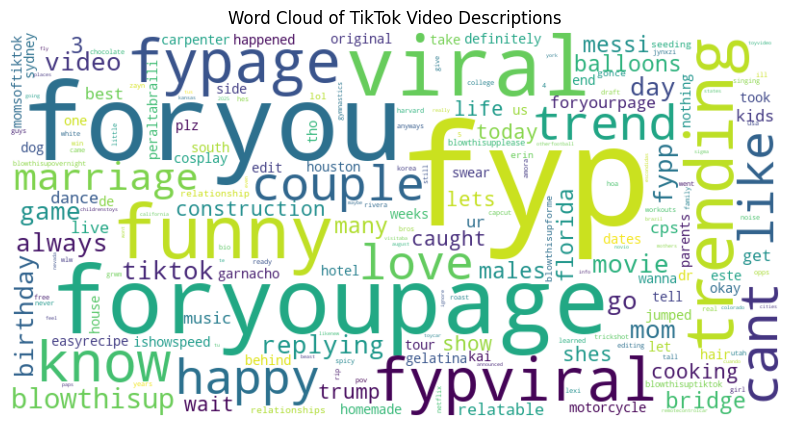

[('fyp', 48), ('foryou', 24), ('foryoupage', 18), ('viral', 14), ('funny', 11), ('trending', 9), ('fypviral', 8), ('fypage', 8), ('know', 7), ('cant', 6), ('happy', 5), ('like', 5), ('couple', 5), ('love', 5), ('trend', 5), ('marriage', 5), ('blowthisup', 5), ('day', 4), ('movie', 4), ('video', 4)]


In [46]:
from collections import Counter
from wordcloud import WordCloud


data = pd.read_csv('bulk_tt_video_data.csv')

# Define stopwords
manual_stopwords = set([
    'i', 'im', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
    'just', 'don', 'should', 'now', 'un', 'ib', 'would',
])

# Function to clean and tokenize text
def clean_text_manual(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    words = [word for word in text.split() if word not in manual_stopwords]
    return words

# Fill NaN values with an empty string and clean the text
data['video_description'] = data['video_description'].fillna('')
data['video_description_cleaned'] = data['video_description'].apply(clean_text_manual)

# Flatten the list of lists into a single list of words
all_words_manual = [word for desc in data['video_description_cleaned'] for word in desc]

# Count the frequency of each word
word_freq_manual = Counter(all_words_manual)
common_words_manual_tt = word_freq_manual.most_common(20)

# Generate a word cloud
wordcloud_manual_tt = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_manual)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_manual_tt, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TikTok Video Descriptions')
plt.show()

print(common_words_manual_tt)

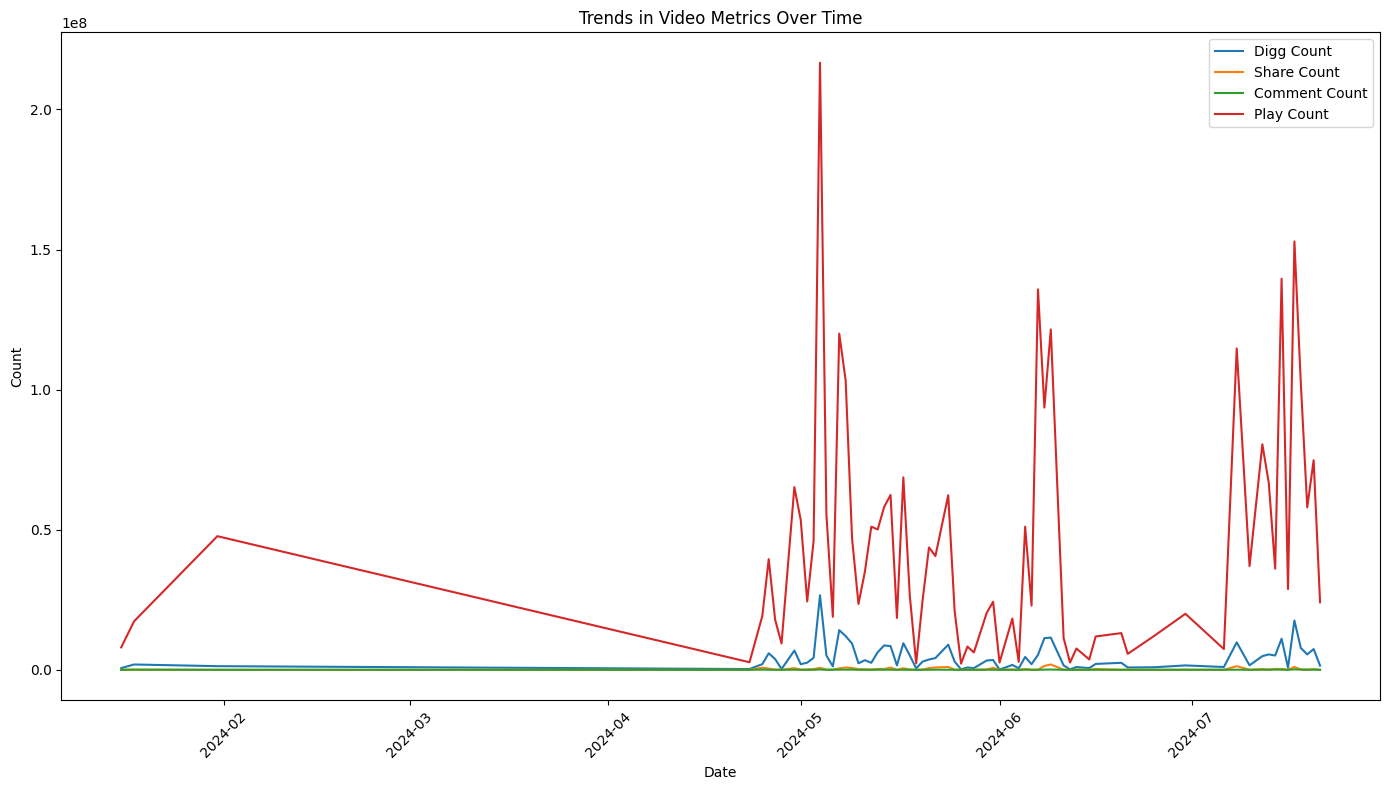

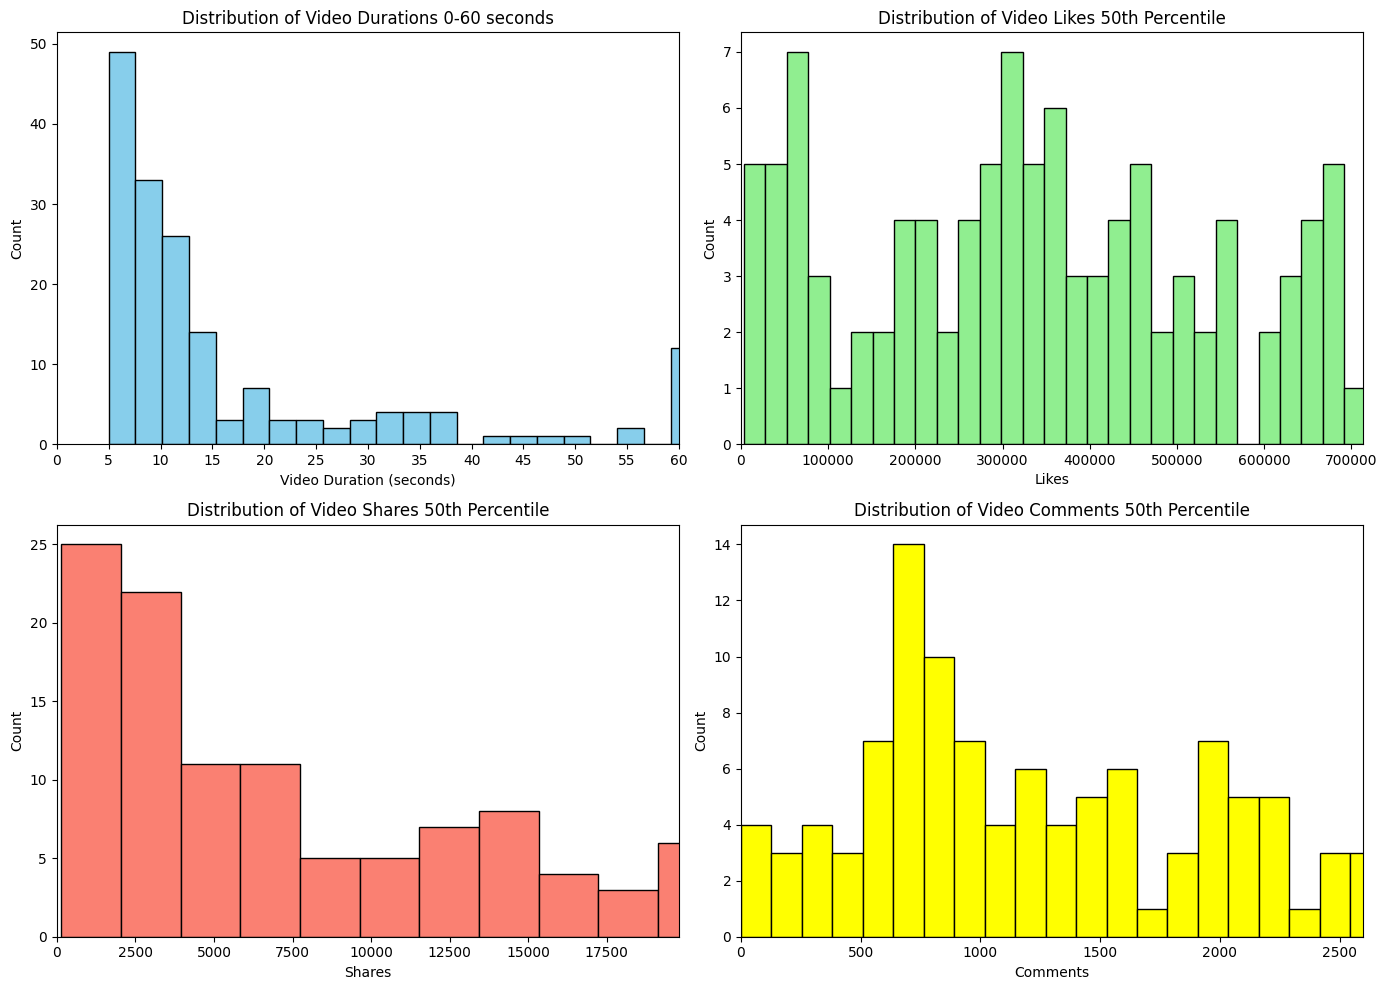

,video_duration,video_diggcount,video_sharecount,video_commentcount,video_playcount
video_duration,1.000000,-0.079016,-0.043361,0.083131,-0.000426
video_diggcount,-0.079016,1.000000,0.662974,0.728695,0.883335
video_sharecount,-0.043361,0.662974,1.000000,0.709698,0.581372
video_commentcount,0.083131,0.728695,0.709698,1.000000,0.678352
video_playcount,-0.000426,0.883335,0.581372,0.678352,1.000000


In [47]:

# Step 1: Read the CSV file
df = pd.read_csv('bulk_tt_video_data.csv')


# Step 4: Convert Data Types
df['video_timestamp'] = pd.to_datetime(df['video_timestamp'])

# Step 5: Aggregate Data by Date
df['date'] = df['video_timestamp'].dt.date
aggregated_df = df.groupby('date').agg({
    'video_diggcount': 'sum',
    'video_sharecount': 'sum',
    'video_commentcount': 'sum',
    'video_playcount': 'sum'
}).reset_index()

# Step 6: Plot Trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='date', y='video_diggcount', label='Digg Count')
sns.lineplot(data=aggregated_df, x='date', y='video_sharecount', label='Share Count')
sns.lineplot(data=aggregated_df, x='date', y='video_commentcount', label='Comment Count')
sns.lineplot(data=aggregated_df, x='date', y='video_playcount', label='Play Count')

plt.title('Trends in Video Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the 50th percentile for each metric
duration_50th_percentile = df['video_duration'].quantile(0.5)
diggcount_50th_percentile = df['video_diggcount'].quantile(0.5)
sharecount_50th_percentile = df['video_sharecount'].quantile(0.5)
commentcount_50th_percentile = df['video_commentcount'].quantile(0.5)

# Plot histograms for video durations and engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Video duration distribution
axes[0, 0].hist(df['video_duration'], bins=200, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Video Durations 0-60 seconds')
axes[0, 0].set_xlabel('Video Duration (seconds)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlim(0, 60)
axes[0, 0].set_xticks(range(0, 61, 5))  # Set x-axis ticks at intervals of 5 seconds

# Video likes distribution
axes[0, 1].hist(df['video_diggcount'], bins=500, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Video Likes 50th Percentile')
axes[0, 1].set_xlabel('Likes')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlim(0, diggcount_50th_percentile)

# Video shares distribution
axes[1, 0].hist(df['video_sharecount'], bins=1000, color='salmon', edgecolor='black')
axes[1, 0].set_title('Distribution of Video Shares 50th Percentile')
axes[1, 0].set_xlabel('Shares')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlim(0, sharecount_50th_percentile)

# Video comments distribution
axes[1, 1].hist(df['video_commentcount'], bins=750, color='yellow', edgecolor='black')
axes[1, 1].set_title('Distribution of Video Comments 50th Percentile')
axes[1, 1].set_xlabel('Comments')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlim(0, commentcount_50th_percentile)

plt.tight_layout()
plt.show()

# Calculate correlations between video duration and engagement metrics
correlations = df[['video_duration', 'video_diggcount', 'video_sharecount', 'video_commentcount', 'video_playcount']].corr()

correlations

Emoji counts: {'💔': 3, '😂': 5, '😭💕': 1, '💀': 1, '🐷': 1, 'シ゚': 9, 'シ': 6, 'ツ': 3, '😭😂': 1, '🏽': 1, '👏': 1, '🔥': 1, '⚖️✨️': 1, '😅': 1, '🇭🇹': 1, '🇬🇵': 1, '🏈': 1, '🌈': 1, '😭😭': 2, '😁': 1, '💯💯💯': 1, '😏😏': 1, '🐌': 1, '😭': 5, '☝️': 1, '🔒': 1, '😂😂': 1, '💜': 1, '😰': 1, '👀': 1, '😮': 1, '💨': 1, '🏻': 1, '♀️': 1, '🌬️🔌': 1, '🔑': 1, '🖇️': 1, '😈': 1, '😝💋': 1, '😖': 1, '💔😭': 1, '🖤': 1, '😎⭐️': 1, '👢': 1, '🙈': 1, '🏼': 1, '🙃': 1, '😜': 1, '🙏🙏🙏': 1, '😘': 1, '🙄': 1, '🇨🇴': 1, '😏': 1, '💕': 1, '😝': 1, '😎': 1, '😂😅': 1, '💀💀': 1, '😃👍🏼': 1, '🇵🇸': 1, '😂❤️': 1, '😊😊': 1, '😣': 1, '😍': 1, '🎈🏠': 1}
Filtered Hashtag counts (more than one usage): {'#messi': 2, '#fypシ': 14, '#viral': 12, '#foryoupage': 18, '#trending': 9, '#fypage': 8, '#construction': 2, '#fyp': 40, '#carpenter': 2, '#motorcycle': 2, '#couple': 3, '#easyrecipe': 2, '#homemade': 2, '#fypツ': 3, '#cooking': 2, '#gelatina': 2, '#foryou': 24, '#hotel': 2, '#momsoftiktok': 2, '#funny': 10, '#relationships': 2, '#relationship': 2, '#marriage': 4, '#blowthisupforme

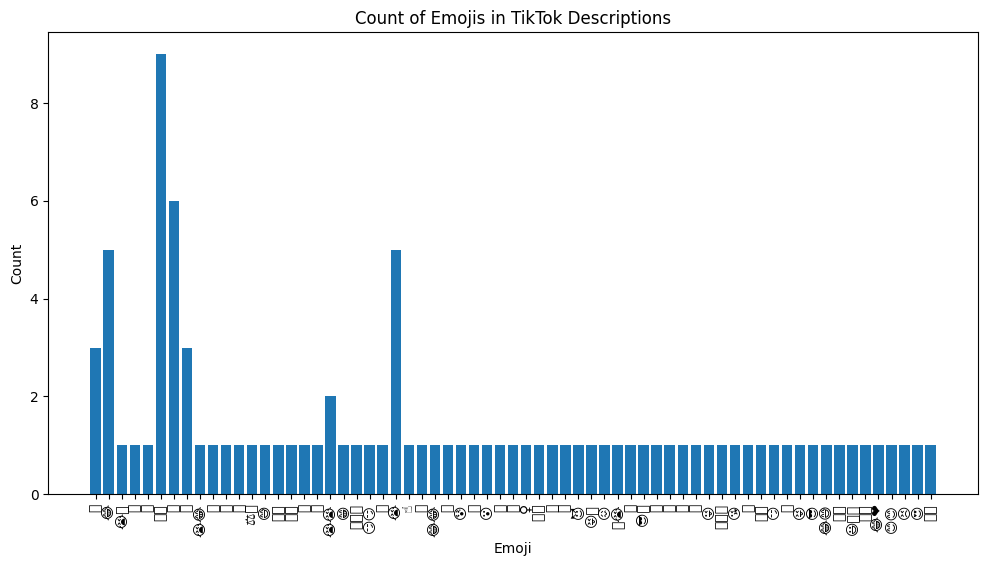

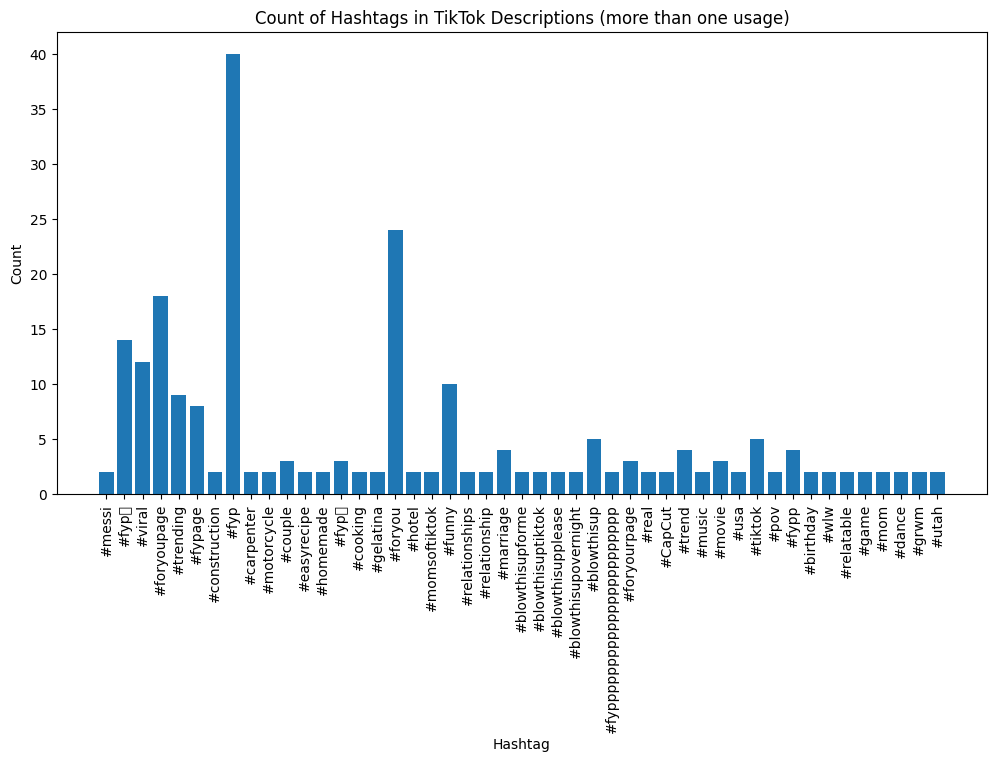

In [56]:
import re

# Load the CSV file
file_path = 'bulk_tt_video_data.csv'
data = pd.read_csv(file_path)

# Function to extract emojis using regex
def extract_emojis_regex(text):
    emoji_pattern = re.compile(
        "["  # Begin character class
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters and other symbols
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.findall(text)

# Function to extract hashtags using regex
def extract_hashtags_regex(text):
    hashtag_pattern = re.compile(r'#\w+')
    return hashtag_pattern.findall(text)

# Extract emojis and hashtags from each video description
data['cleaned_description'] = data['video_description'].apply(lambda x: str(x).strip())
data['emojis'] = data['cleaned_description'].apply(lambda desc: extract_emojis_regex(desc))
data['hashtags'] = data['cleaned_description'].apply(lambda desc: extract_hashtags_regex(desc))

# Count the occurrences of each emoji
emoji_counts = {}
for emojis in data['emojis']:
    for emoji in emojis:
        if emoji in emoji_counts:
            emoji_counts[emoji] += 1
        else:
            emoji_counts[emoji] = 1

# Count the occurrences of each hashtag
hashtag_counts = {}
for hashtags in data['hashtags']:
    for hashtag in hashtags:
        if hashtag in hashtag_counts:
            hashtag_counts[hashtag] += 1
        else:
            hashtag_counts[hashtag] = 1

# Print the emoji counts to verify
print("Emoji counts:", emoji_counts)

# Filter hashtags with more than one usage
filtered_hashtags = {hashtag: count for hashtag, count in hashtag_counts.items() if count > 1}

# Print filtered hashtag counts
print("Filtered Hashtag counts (more than one usage):", filtered_hashtags)

# Prepare data for plotting
def plot_counts(counts, title, xlabel):
    labels = list(counts.keys())
    values = list(counts.values())
    
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Plot the results
plot_counts(emoji_counts, 'Count of Emojis in TikTok Descriptions', 'Emoji')
plot_counts(filtered_hashtags, 'Count of Hashtags in TikTok Descriptions (more than one usage)', 'Hashtag')


### YouTube Analysis

In [49]:

file_path = 'bulk_yt_video_data.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['description', 'rating', 'captions']
df = df.drop(columns=columns_to_drop, errors='ignore')

print("First few rows of the dataset:")
print(df.head())

print("\nInformation about the dataset:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Example strategy: Drop rows with missing values
df_cleaned = df.dropna()


First few rows of the dataset:
                                               title             author  \
0  Dear Hannah, Look!I was going to take. you on ...    Enjoylifewithme   
1                😗✌️#sofimanassyan #relatable #crush     Sofi Manassyan   
2                                 What would you do?          Giga doge   
3                                       💔 #cat #cats      Sonyakisa8 TT   
4                      Cold War Patriots 30 sec spot  Cold War Patriots   

                 channel_id      views  length metadata  
0  UCpN2_4s77RtHQbE-arnTW5A    2946703       5       []  
1  UCZFBnnCCO65xMXOdtFz8CfA   21400923       7       []  
2  UC-kseLVCHuNYYMlCHxLXiFA   11704348       6       []  
3  UCS56r87Y7q1SrAB-42brE-w  373424721      15       []  
4  UCo4HOwfiIxRzIG1ySxtI9cg    1691469      30       []  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  D

#### Visualization

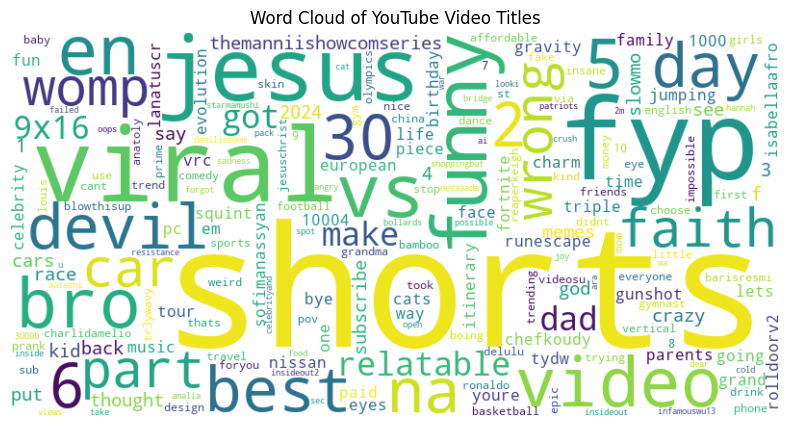

[('shorts', 37), ('fyp', 12), ('viral', 10), ('jesus', 9), ('vs', 6), ('funny', 6), ('video', 5), ('en', 5), ('bro', 5), ('5', 5), ('30', 4), ('6', 4), ('2', 4), ('na', 4), ('devil', 4), ('best', 4), ('day', 4), ('faith', 4), ('wrong', 4), ('womp', 4)]


In [52]:

data = pd.read_csv('bulk_yt_video_data.csv')

# Fill NaN values with an empty string and clean the text
data['title'] = data['title'].fillna('')
data['title_cleaned'] = data['title'].apply(clean_text_manual)

# Flatten the list of lists into a single list of words
all_words_manual = [word for desc in data['title_cleaned'] for word in desc]

# Count the frequency of each word
word_freq_manual = Counter(all_words_manual)
common_words_manual_yt = word_freq_manual.most_common(20)

# Generate a word cloud
wordcloud_manual_yt = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_manual)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_manual_yt, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of YouTube Video Titles')
plt.show()

print(common_words_manual_yt)

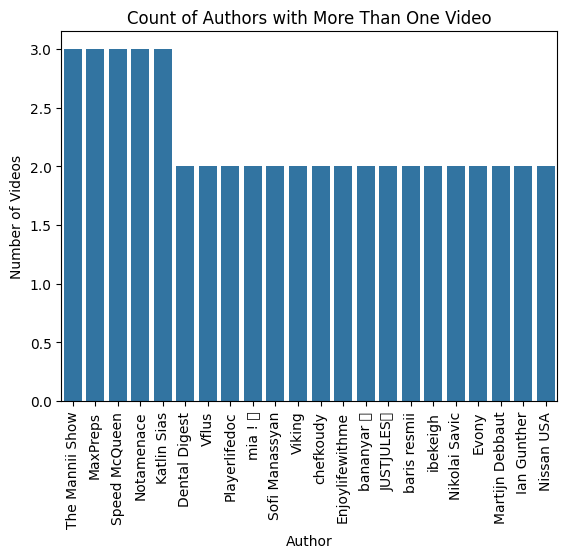

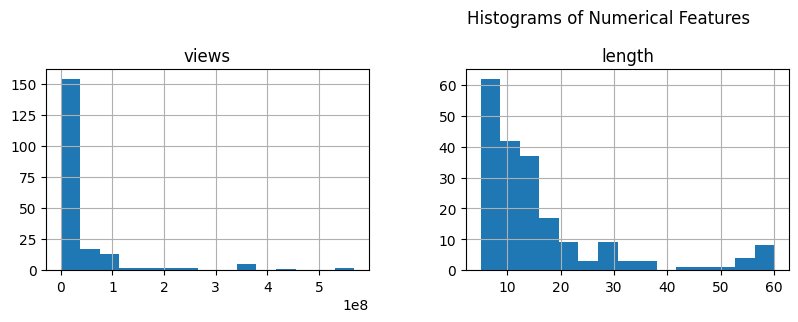

In [54]:

# Assuming df_cleaned is your cleaned DataFrame
# Check if 'author' column exists
if 'author' in df_cleaned.columns:
    author_counts = df_cleaned['author'].value_counts()
    authors_more_than_one = author_counts[author_counts > 1]  # Filter authors with more than one video
else:
    authors_more_than_one = pd.Series()

# Bar plot for authors with more than one video
if not authors_more_than_one.empty:
    sns.barplot(x=authors_more_than_one.index, y=authors_more_than_one.values)
    plt.title('Count of Authors with More Than One Video')
    plt.xlabel('Author')
    plt.ylabel('Number of Videos')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No authors with more than one video found.")

# Plot histograms for numerical features
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
if not numerical_features.empty:
    df_cleaned[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
    plt.suptitle('Histograms of Numerical Features')
    plt.show()
else:
    print("No numerical features found.")

# Scatter plot for 'views' vs 'likes'
if 'views' in df_cleaned.columns and 'likes' in df_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_cleaned, x='views', y='likes')
    plt.title('Scatter plot between Views and Likes')
    plt.show()
else:
    print("")


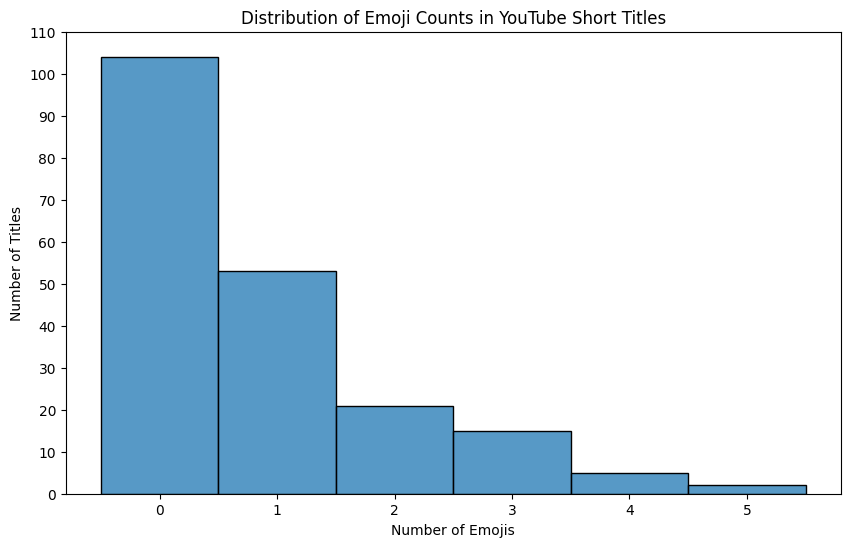

In [59]:
import emoji

file_path = 'bulk_yt_video_data.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['description', 'rating', 'captions']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Function to count emojis in a string
def count_emojis(s):
    return sum(1 for char in s if emoji.is_emoji(char))

# Apply the function to the title column
df['emoji_count'] = df['title'].apply(count_emojis)

# Plot the distribution of emoji counts
plt.figure(figsize=(10, 6))
sns.histplot(df['emoji_count'], bins=range(df['emoji_count'].max() + 2), kde=False)
plt.title('Distribution of Emoji Counts in YouTube Short Titles')
plt.xlabel('Number of Emojis')
plt.ylabel('Number of Titles')
plt.xticks([x + 0.5 for x in range(df['emoji_count'].max() + 1)], range(df['emoji_count'].max() + 1))
plt.yticks(range(0, df['emoji_count'].value_counts().max() + 10, 10))
plt.show()

## Conclusion


### Combined Results
The analysis revealed distinct user engagement patterns and content dynamics across the two platforms. YouTube Shorts exhibited a higher average view duration, suggesting more sustained viewer interest per video. Conversely, TikTok's "For You" page showed greater overall engagement, with a higher frequency of likes, comments, and shares, indicating a more interactive and viral community environment. Content-wise, YouTube Shorts tended to feature more educational and informational videos, while TikTok's "For You" page was dominated by trends, challenges, and entertainment content. These differences highlight the unique niches each platform occupies in the short-form video landscape, catering to varied user preferences and content consumption behaviors.

Here's a comparison of key metrics between TikTok and YouTube Shorts:

Average View Duration:
TikTok: 31.84 seconds
YouTube Shorts: 16.26 seconds

Average Number of Likes (TikTok only):
TikTok: 1,462,484 likes

Average Number of Comments (TikTok only):
TikTok: 7,619 comments

Average Number of Shares (TikTok only): TikTok: 92,138 shares

Total Views:
TikTok: 2,916,053,600 views
YouTube Shorts: 7,986,381,409 views

**Analysis:**
Average View Duration: TikTok videos have a higher average view duration, suggesting that users tend to watch TikTok videos for a longer period compared to YouTube Shorts.
Total Views: YouTube Shorts has a significantly higher total view count, indicating a broader reach or higher number of videos.
Engagement Metrics (TikTok only): TikTok videos receive a high average number of likes, comments, and shares, highlighting a highly interactive user base.

Sorted Combined Emoji counts: {'😂': 12, '😭': 10, 'シ゚': 10, 'シ': 9, '💀': 8, '😱': 6, '💔': 4, '👀': 4, '🔥': 4, '😅': 3, 'ツ': 3, '😳': 2, '👨🏼': 2, '💐': 2, '☠️': 2, '💯': 2, '😭😭': 2, '⚽️': 2, '👏': 2, '🏽': 2, '😍': 2, '슬릭백': 2, '️': 2, '😎': 2, '😮': 2, '💀😭': 2, '😦': 2, '😁': 2, '😈': 2, '😌🎶': 1, '😡😡😡': 1, '초등학생': 1, '🌊': 1, '🙄': 1, '😊😊': 1, '💨😍': 1, '☝️': 1, '😳😂': 1, '😤🔥': 1, '😬': 1, '👢': 1, '😘': 1, '🍉😋': 1, '🍳': 1, '춤추는곰돌': 1, '🏼': 1, '😅😬✈️': 1, '✨': 1, '🔥💪': 1, '💯💯💯': 1, '😂❤️': 1, '🍬': 1, '英语': 1, '🇭🇹': 1, '🏻': 1, '💜': 1, '중력이': 1, '📸': 1, '😖': 1, '❤️': 1, '춤추는곰돌의랜덤댄스': 1, '😜': 1, '🍳🔥': 1, '세상': 1, '👀😅': 1, '🏈': 1, '😢': 1, '😎🙌': 1, '⚖️✨️': 1, '🌈': 1, '🔑': 1, '😂😭': 1, '😎❤️🍫': 1, '💀💀': 1, '😂😂😂': 1, '댄스': 1, '😨😥': 1, '￼': 1, '사라진': 1, '😗✌️': 1, '💛💚': 1, '😏': 1, '😠': 1, '😭💕': 1, '😍😋': 1, '🇵🇸': 1, '😡': 1, '🇬🇵': 1, '♂️': 1, '☺️💓': 1, '💕': 1, '💔😭': 1, '💛🏍️': 1, '😭😂': 1, '😣': 1, '🐐📈': 1, '🖇️': 1, '😝💋': 1, '🌟': 1, '♀️': 1, '🔒': 1, '😭❤️': 1, '🐷': 1, '😰': 1, '🙈': 1, '😏😏': 1, '🎈🏠': 1, '😃👍🏼': 1, '👃🏼': 1, '🚘': 

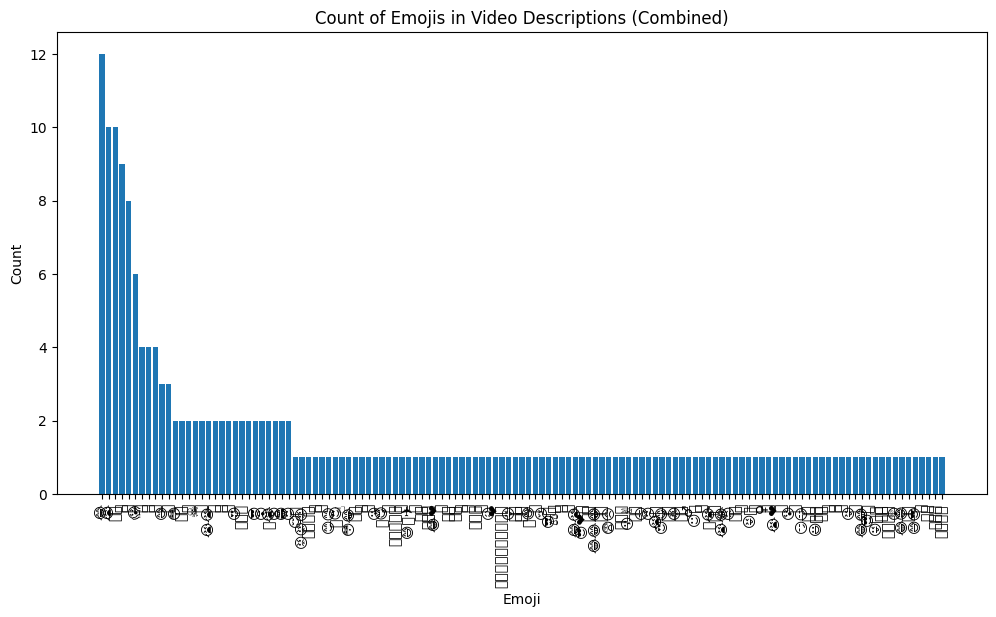

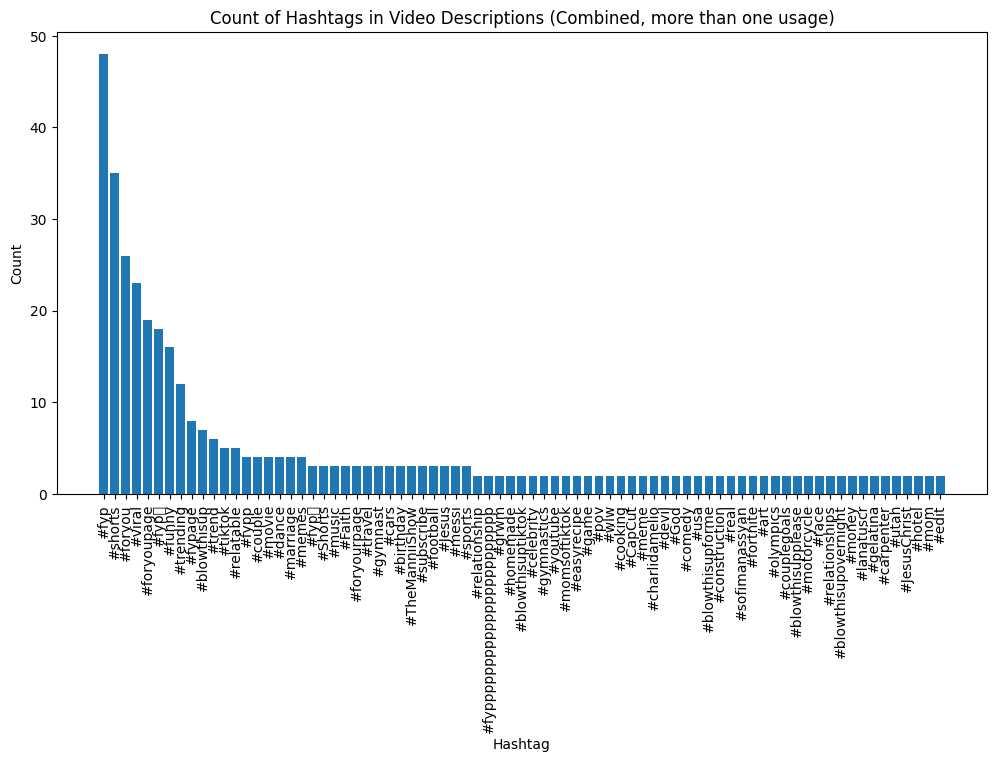

In [60]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
file_path_yt = 'bulk_yt_video_data.csv'
data_yt = pd.read_csv(file_path_yt)

file_path = 'bulk_tt_video_data.csv'
data = pd.read_csv(file_path)

# Function to extract emojis using regex
def extract_emojis_regex(text):
    emoji_pattern = re.compile(
        "["  # Begin character class
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters and other symbols
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.findall(text)

# Function to extract hashtags using regex
def extract_hashtags_regex(text):
    hashtag_pattern = re.compile(r'#\w+')
    return hashtag_pattern.findall(text)

# Extract emojis and hashtags from each video description
data['cleaned_description'] = data['video_description'].apply(lambda x: str(x).strip())
data['emojis'] = data['cleaned_description'].apply(lambda desc: extract_emojis_regex(desc))
data['hashtags'] = data['cleaned_description'].apply(lambda desc: extract_hashtags_regex(desc))

data_yt['cleaned_title'] = data_yt['title'].apply(lambda x: str(x).strip())
data_yt['emojis'] = data_yt['cleaned_title'].apply(lambda desc: extract_emojis_regex(desc))
data_yt['hashtags'] = data_yt['cleaned_title'].apply(lambda desc: extract_hashtags_regex(desc))

# Count the occurrences of each emoji
emoji_counts_tt = {}
for emojis in data['emojis']:
    for emoji in emojis:
        if emoji in emoji_counts_tt:
            emoji_counts_tt[emoji] += 1
        else:
            emoji_counts_tt[emoji] = 1

emoji_counts_yt = {}
for emojis in data_yt['emojis']:
    for emoji in emojis:
        if emoji in emoji_counts_yt:
            emoji_counts_yt[emoji] += 1
        else:
            emoji_counts_yt[emoji] = 1

# Combine emoji counts from both dataframes
combined_emoji_counts = {}
for emoji in set(emoji_counts_tt) | set(emoji_counts_yt):
    combined_emoji_counts[emoji] = emoji_counts_tt.get(emoji, 0) + emoji_counts_yt.get(emoji, 0)

# Count the occurrences of each hashtag
hashtag_counts_tt = {}
for hashtags in data['hashtags']:
    for hashtag in hashtags:
        if hashtag in hashtag_counts_tt:
            hashtag_counts_tt[hashtag] += 1
        else:
            hashtag_counts_tt[hashtag] = 1

hashtag_counts_yt = {}
for hashtags in data_yt['hashtags']:
    for hashtag in hashtags:
        if hashtag in hashtag_counts_yt:
            hashtag_counts_yt[hashtag] += 1
        else:
            hashtag_counts_yt[hashtag] = 1

# Combine hashtag counts from both dataframes
combined_hashtag_counts = {}
for hashtag in set(hashtag_counts_tt) | set(hashtag_counts_yt):
    combined_hashtag_counts[hashtag] = hashtag_counts_tt.get(hashtag, 0) + hashtag_counts_yt.get(hashtag, 0)

# Filter hashtags with more than one usage
filtered_hashtags_combined = {hashtag: count for hashtag, count in combined_hashtag_counts.items() if count > 1}

# Sort counts from high to low
sorted_emoji_counts = dict(sorted(combined_emoji_counts.items(), key=lambda item: item[1], reverse=True))
sorted_filtered_hashtags = dict(sorted(filtered_hashtags_combined.items(), key=lambda item: item[1], reverse=True))

# Print sorted counts to verify
print("Sorted Combined Emoji counts:", sorted_emoji_counts)
print("Sorted Filtered Combined Hashtag counts (more than one usage):", sorted_filtered_hashtags)

# Prepare data for plotting
def plot_counts(counts, title, xlabel):
    labels = list(counts.keys())
    values = list(counts.values())
    
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Plot the results
plot_counts(sorted_emoji_counts, 'Count of Emojis in Video Descriptions (Combined)', 'Emoji')
plot_counts(sorted_filtered_hashtags, 'Count of Hashtags in Video Descriptions (Combined, more than one usage)', 'Hashtag')


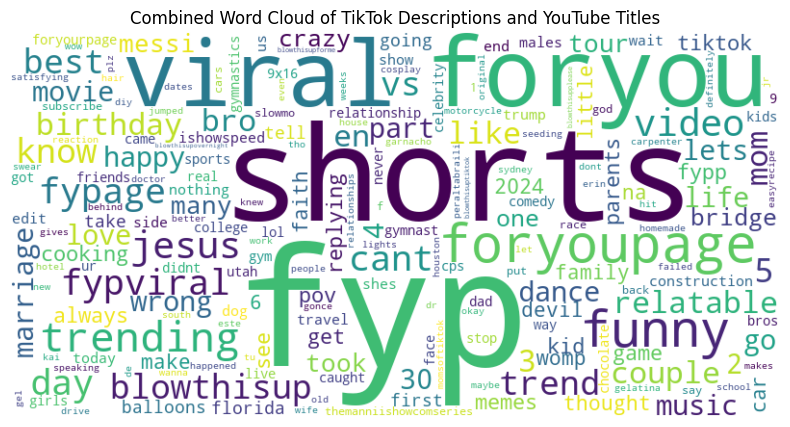

Common Words (Combined): [('fyp', 60), ('shorts', 37), ('foryou', 26), ('viral', 24), ('foryoupage', 19), ('funny', 17), ('trending', 11), ('video', 9), ('jesus', 9), ('day', 8), ('fypviral', 8), ('fypage', 8), ('cant', 8), ('know', 7), ('trend', 7), ('blowthisup', 7), ('best', 7), ('vs', 7), ('5', 7), ('like', 6)]


In [61]:
from collections import Counter
from wordcloud import WordCloud
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define stopwords
manual_stopwords = set([
    'i', 'im', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
    'just', 'don', 'should', 'now', 'un', 'ib', 'would',
])

# Function to clean and tokenize text
def clean_text_manual(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    words = [word for word in text.split() if word not in manual_stopwords]
    return words

# Process TikTok video descriptions
data_tt = pd.read_csv('bulk_tt_video_data.csv')
data_tt['video_description'] = data_tt['video_description'].fillna('')
data_tt['video_description_cleaned'] = data_tt['video_description'].apply(clean_text_manual)

# Flatten the list of lists into a single list of words
all_words_tt = [word for desc in data_tt['video_description_cleaned'] for word in desc]
word_freq_tt = Counter(all_words_tt)

# Process YouTube video titles
data_yt = pd.read_csv('bulk_yt_video_data.csv')
data_yt['title'] = data_yt['title'].fillna('')
data_yt['title_cleaned'] = data_yt['title'].apply(clean_text_manual)

# Flatten the list of lists into a single list of words
all_words_yt = [word for desc in data_yt['title_cleaned'] for word in desc]
word_freq_yt = Counter(all_words_yt)

# Combine word frequencies from both datasets
combined_word_freq = word_freq_tt + word_freq_yt

# Generate a combined word cloud
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_word_freq)

# Plot the combined word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.axis('off')
plt.title('Combined Word Cloud of TikTok Descriptions and YouTube Titles')
plt.show()

# Print the most common words
common_words_combined = combined_word_freq.most_common(20)
print("Common Words (Combined):", common_words_combined)



### TikTok Data:
- **Comprehensive Metrics:** TikTok's dataset includes detailed metrics such as video duration, likes (diggcount), shares, comments, and play counts.
- **User Interactions:** Availability of engagement metrics like likes, comments, and shares allows for a nuanced understanding of user interaction and content virality.
- **Granular Insights:** The rich dataset enables deeper insights into how users interact with content, providing a more comprehensive view of engagement beyond just view counts.

### YouTube Data:
- **Limited Metrics:** The YouTube dataset is more limited, primarily providing information on video length and total views.
- **Missing Engagement Data:** Key metrics such as likes, comments, and shares are not available, which restricts the ability to analyze user interaction comprehensively.
- **Basic Engagement Insights:** The lack of detailed engagement metrics limits the ability to fully understand user behavior and content impact.


## References
   - YouTube Shorts Downloader loosely based on https://github.com/3verlaster/youtube-shorts-downloader (I do not reccomend using this repository)
   - Pyktok used for gathering TikTok metadata

